In [24]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
import fiona
import os
import seaborn as sns
import matplotlib.pyplot as plt
current_dir=os.getcwd()
current_dir
#help(fiona.open)

'/home/angelica/Documents/py_linux/pylocss/src'

In [16]:
#get brazil first 
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

south_america = world.query('continent == "South America"')
#world['continent'].unique()
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

/home/angelica/.conda/envs/geo_env/lib/python3.10/site-packages/geoplot/geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/home/angelica/.conda/envs/geo_env/lib/python3.10/site-packages/geoplot/geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

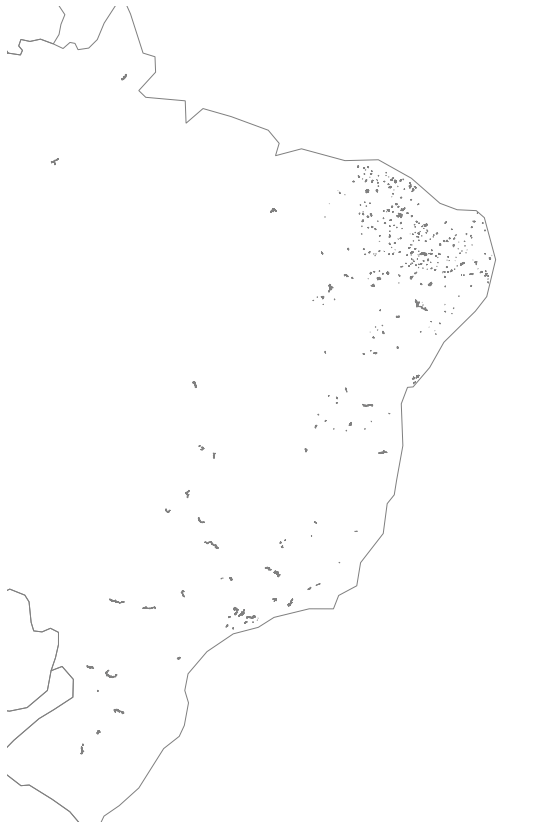

In [20]:
#read shapefiles



shp_dir='../data/spatial/'
shp_name='joined_hydrolakes_brazilr.shp'
gdf_lake_br_hl=gpd.read_file(shp_dir + shp_name)
ax = geoplot.polyplot(south_america, edgecolor='gray', figsize = (20,15))
gplt.choropleth(gdf_lake_br_hl, hue = gdf_lake_br_hl['area_km'], edgecolor = 'gray', cmap='Greens', ax=ax)
#gdf_lake_br_hl.head(3)

In [27]:
#get the columns
gdf_lake_br_hl.columns
#For codes of brazil cod_sar

Index(['gid', 'esp_cd', 'cod_snisb', 'cod_sar', 'nmoriginal', 'nmalternat',
       'nmgenerico', 'nmligacao', 'nmespecifi', 'detipomass', 'dedominial',
       'dedominio', 'defiscaliz', 'nmemp', 'fonmemp', 'dtreserv', 'fodtreserv',
       'nuvolumhm3', 'fonuvolume', 'nuperimkm', 'nuareakm2', 'nuareaha',
       'nucompgeom', 'usoprinc', 'fousoprinc', 'detipoapr', 'detipomda',
       'salinidade', 'regime', 'nmriocomp', 'nmufe', 'nmmun', 'defonte',
       'desatelite', 'deversao', 'deobs', 'nuvzreg', 'nuvzlago', 'nuvzdeflu',
       'cdtipooper', 'detipooper', 'fovzlago', 'fovzdeflu', 'fovzreg',
       'cobarprin', 'cotrecho', 'nuvzrecebe', 'nuvztransf', 'deobsvazao',
       'cocda2013', 'cocda2017', 'area_km', 'Hylak_id', 'Lake_name', 'Country',
       'Continent', 'Poly_src', 'Lake_type', 'Grand_id', 'Lake_area',
       'Shore_len', 'Shore_dev', 'Vol_total', 'Vol_res', 'Vol_src',
       'Depth_avg', 'Dis_avg', 'Res_time', 'Elevation', 'Slope_100',
       'Wshd_area', 'Pour_long', 'Pour_

In [46]:
#extract duplicated lakes
gdf_duplicated=gdf_lake_br_hl.loc[gdf_lake_br_hl.duplicated(subset=['cod_sar'], keep=False)].copy()
gdf_not_duplicated=gdf_lake_br_hl.loc[~gdf_lake_br_hl.duplicated(subset=['cod_sar'], keep=False)].copy()
print(gdf_duplicated.shape, gdf_not_duplicated.shape)

#I have 82 duplicates and 341 not duplicate

(82, 74) (341, 74)


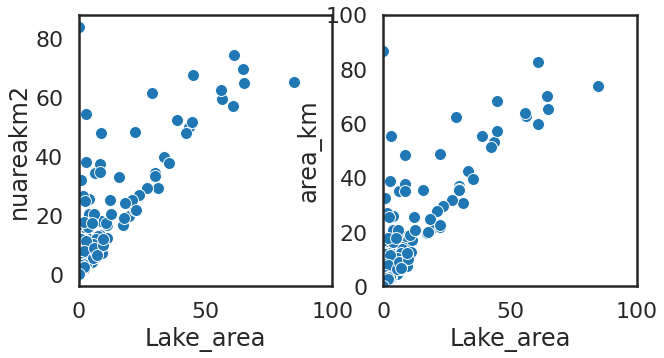

In [43]:
#plot areas between lakes from hydrolakes and brazilian lakes (reservoirs)

sns.set_style('white')
sns.set_context('poster', font_scale=1.0)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))

df=gdf_not_duplicated[['area_km','Lake_area', 'nuareakm2']].copy()

facet_c='gauge_id'
x_field='Lake_area'
y_field='nuareakm2'
facet_c='Country_State'
y_lim=[0,100]
#kind_plot='line'
sns.scatterplot(data=df,x=x_field,y=y_field,#hue=hue,
             #legend=True, color=palette,
             #kind=kind_plot,
             #col_wrap=3,
             #col=facet_c,# col_order=facet_c_order,
             #row=facet_r,row_order=facet_r_order,
             #aspect=.9,
             #height=10, 
             ax=axes[0])
plt.xlim(y_lim[0],y_lim[1])
plt.ylim(y_lim[0],y_lim[1])
y_field='area_km'
sns.scatterplot(data=df,x=x_field,y=y_field,#hue=hue,
             #legend=True, color=palette,
             #kind=kind_plot,
             #col_wrap=3,
             #col=facet_c,# col_order=facet_c_order,
             #row=facet_r,row_order=facet_r_order,
             #aspect=.9,height=10, 
             ax=axes[1])
#g_n.set_xticklabels(rotation=90, horizontalalignment='right')
plt.xlim(y_lim[0],y_lim[1])
plt.ylim(y_lim[0],y_lim[1])
#g_n.savefig('../data/20220204.png')

plt.show()
del df

count    341.000000
mean       0.540224
std        0.322702
min        0.001552
25%        0.248839
50%        0.534384
75%        0.823411
max        1.316619
Name: per_area_br_hl, dtype: float64

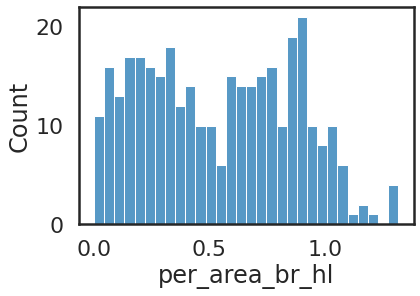

In [51]:
#Get an area index and take only those greater than the 80% of the reservoirs
#'per_area_br_hl' percentage of the area between brazilian lakes and hydrolakes 
gdf_not_duplicated['per_area_br_hl']=gdf_not_duplicated['Lake_area']/gdf_not_duplicated['nuareakm2']
sns.histplot(data=gdf_not_duplicated, x="per_area_br_hl", bins=30)
gdf_not_duplicated['per_area_br_hl'].describe()